Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans["delinq_2yrs"].value_counts()

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
13       1
7        1
8        1
11       1
Name: delinq_2yrs, dtype: int64

# Exploratory Data Analysis


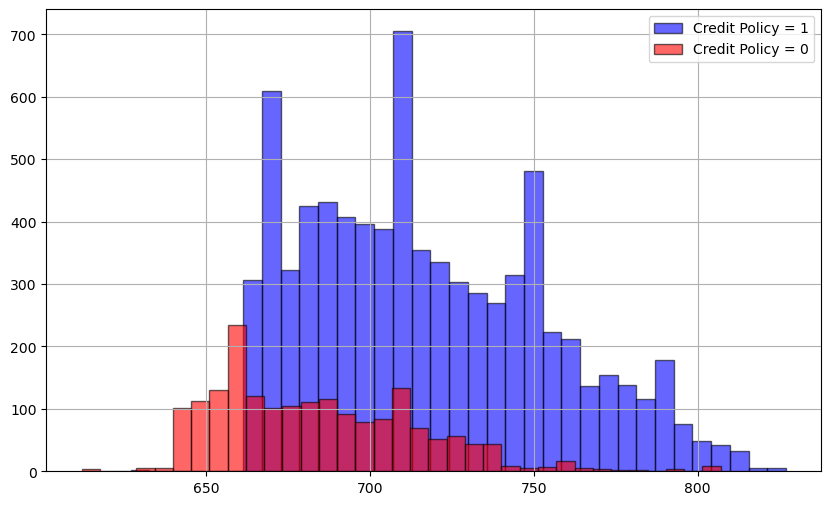

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit_policy']==1]['fico'].hist(bins=35,label = 'Credit Policy = 1',color='blue',alpha = 0.6,edgecolor = "black")
loans[loans['credit_policy']==0]['fico'].hist(bins=35,label = 'Credit Policy = 0',color='red',alpha = 0.6,edgecolor = "black")

plt.legend()


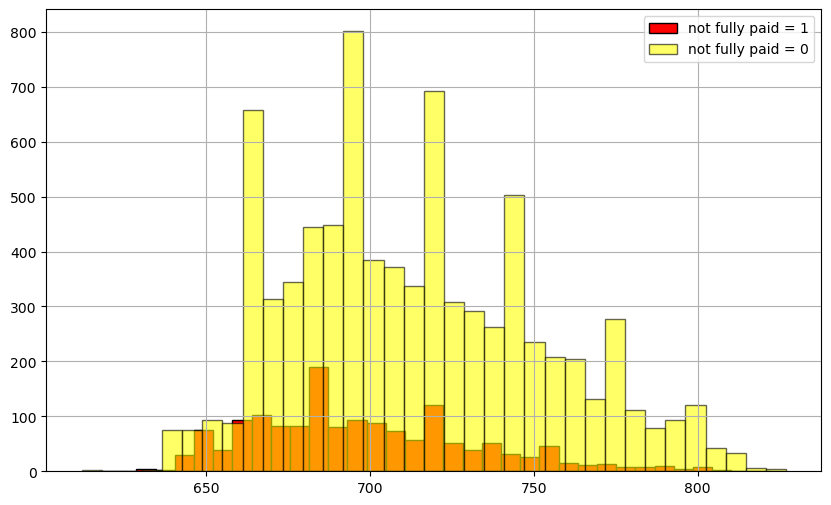

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not_fully_paid']==1]['fico'].hist(bins=35,label = 'not fully paid = 1',color='red',edgecolor = "black")
loans[loans['not_fully_paid']==0]['fico'].hist(bins=35,label = 'not fully paid = 0',color='yellow',alpha = 0.6,edgecolor = "black")

plt.legend()


<AxesSubplot:xlabel='purpose', ylabel='count'>

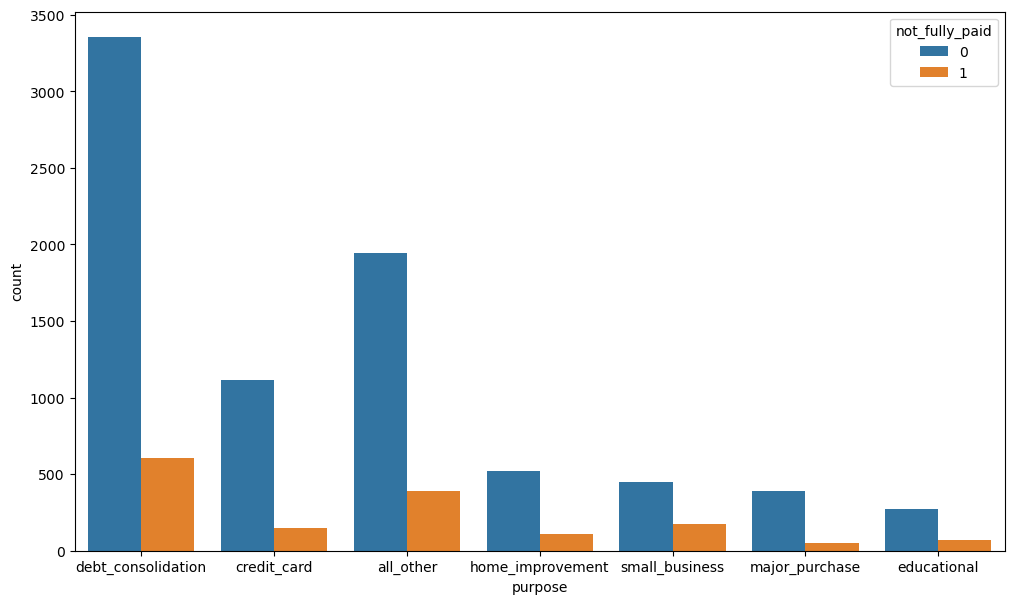

In [9]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose', data = loans, hue = 'not_fully_paid')

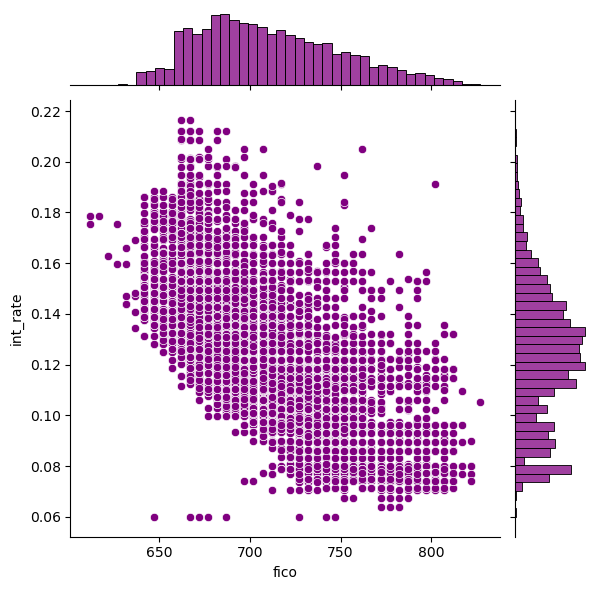

In [10]:
sns.jointplot(x = 'fico', y = 'int_rate', data = loans, color='purple')

<Figure size 1100x700 with 0 Axes>

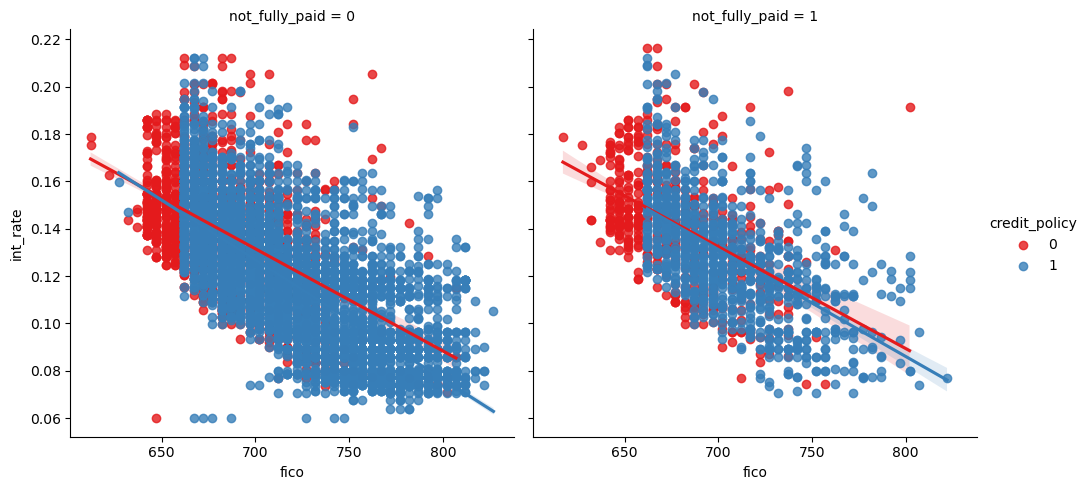

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int_rate', x='fico', data=loans, hue='credit_policy', palette = 'Set1', col='not_fully_paid')

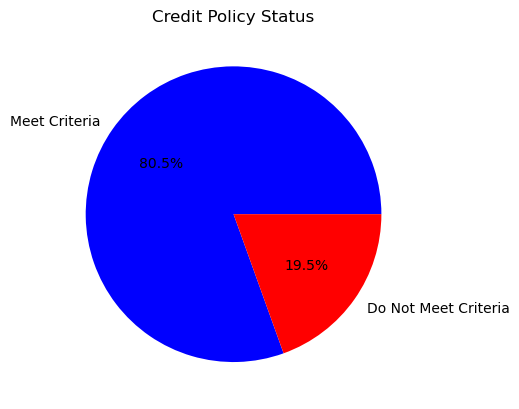

In [12]:
plt.pie(loans['credit_policy'].value_counts(), labels=['Meet Criteria', 'Do Not Meet Criteria'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Credit Policy Status')
plt.show()

<AxesSubplot:>

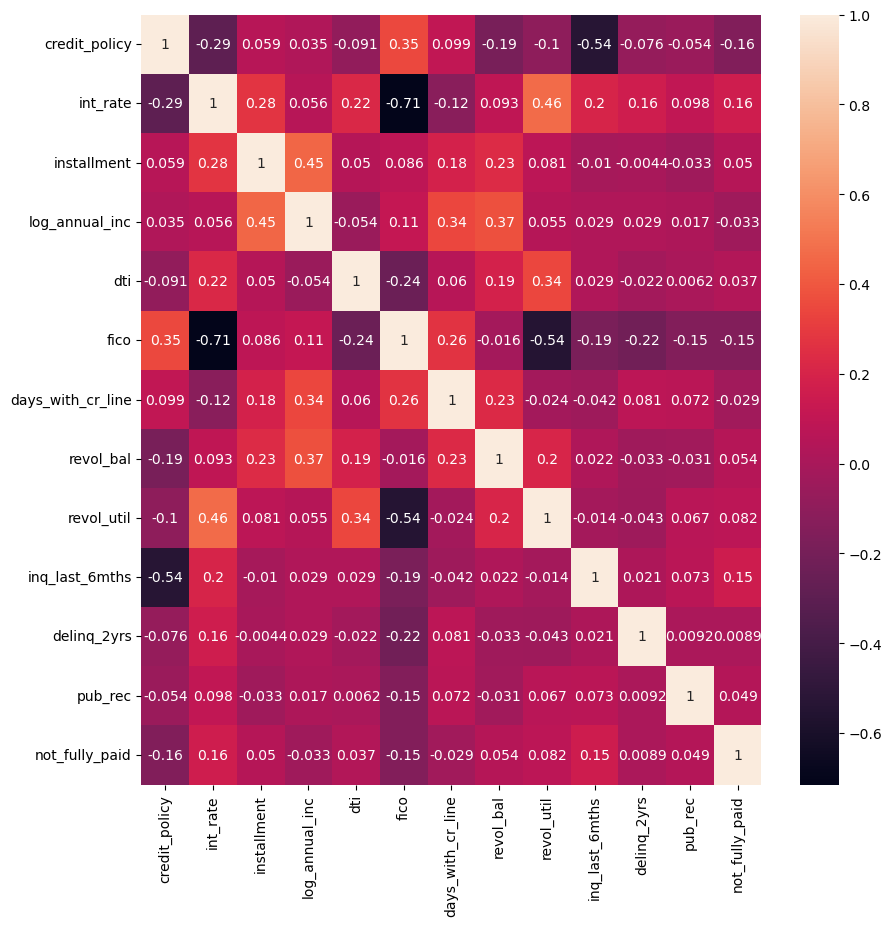

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(loans.corr(),annot=True)

# Setting up the Data

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
all_puropse = ['purpose']

In [16]:
final_data = pd.get_dummies(loans,columns=all_puropse,drop_first=True)

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_policy               9578 non-null   int64  
 1   int_rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log_annual_inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days_with_cr_line           9578 non-null   float64
 7   revol_bal                   9578 non-null   int64  
 8   revol_util                  9578 non-null   float64
 9   inq_last_6mths              9578 non-null   int64  
 10  delinq_2yrs                 9578 non-null   int64  
 11  pub_rec                     9578 non-null   int64  
 12  not_fully_paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [18]:
final_data.tail()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0
9577,0,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1,0,1,0,0,0,0


## Train Test Split


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = final_data.drop('not_fully_paid', axis=1)
y = final_data['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Training a Decision Tree Model



In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
predictions = dtree.predict(X_test)

In [25]:
dtree.score(X_test,y_test)

0.7140145523568491

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2666
           1       0.17      0.21      0.19       495

    accuracy                           0.71      3161
   macro avg       0.51      0.51      0.51      3161
weighted avg       0.74      0.71      0.73      3161



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[2152  514]
 [ 390  105]]


## Training the Random Forest model


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=300)

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [31]:
predictions = rfc.predict(X_test)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2666
           1       0.53      0.02      0.03       495

    accuracy                           0.84      3161
   macro avg       0.69      0.51      0.47      3161
weighted avg       0.80      0.84      0.78      3161



In [33]:
print(confusion_matrix(y_test, predictions))

[[2659    7]
 [ 487    8]]


In [34]:
rfc.score(X_test,y_test)

0.8437203416640303

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2666
           1       0.53      0.02      0.04       495

    accuracy                           0.84      3161
   macro avg       0.69      0.51      0.48      3161
weighted avg       0.80      0.84      0.78      3161



In [43]:
print(confusion_matrix(y_test, y_pred))

[[2657    9]
 [ 485   10]]


## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
predictions = knn.predict(X_test)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2666
           1       0.21      0.05      0.09       495

    accuracy                           0.82      3161
   macro avg       0.53      0.51      0.49      3161
weighted avg       0.75      0.82      0.77      3161



In [49]:
print(confusion_matrix(y_test, predictions))

[[2564  102]
 [ 468   27]]


## CV

In [47]:
from sklearn.model_selection import StratifiedKFold

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [50]:
scores1 = cross_val_score(dtree, X_train, y_train,cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

Accuracy: 0.741 (0.003)


In [51]:
scores2 = cross_val_score(rfc, X_train, y_train,cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))

Accuracy: 0.836 (0.002)


In [52]:
scores3 = cross_val_score(lr, X_train, y_train,cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores3), np.std(scores3)))

Accuracy: 0.839 (0.002)


In [53]:
scores4 = cross_val_score(knn, X_train, y_train,cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores4), np.std(scores4)))

Accuracy: 0.814 (0.005)


## Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'R_F_C': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'leaf_size' : [100, 1000],
                'algorithm' : ['kd_tree', 'brute'],
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,R_F_C,0.841893,"{'max_depth': 30, 'max_features': 'sqrt', 'min..."
1,KNN,0.817049,"{'algorithm': 'kd_tree', 'leaf_size': 100}"


In [35]:
X

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


## Deployment

In [36]:
import pickle

In [37]:
with open('data.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [38]:
with open('data.sav', 'wb') as f:
    pickle.dump(rfc, f)

In [42]:
import bz2
ofile = bz2.BZ2File("BinaryData.pkl",'wb')
pickle.dump(rfc,ofile)
ofile.close()

In [55]:
import numpy as np
input_data = (1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
prediction

array([0], dtype=int64)

In [56]:
import numpy as np
input_data = (0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
prediction

array([1], dtype=int64)

In [57]:
selected_features

Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths'],
      dtype='object')

In [44]:
import gzip
import pickle
import os
 
# Serialize and save the data to a file
with gzip.open("BinaryData.pkl.gz", "wb") as f:
    pickle.dump(rfc, f)
 
# Print the size of the compressed file
print(os.path.getsize("BinaryData.pkl.gz"))


6424848
